# K-**means_Psicologia**

In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [13]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [22]:
df_psico.describe()
df_psico.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

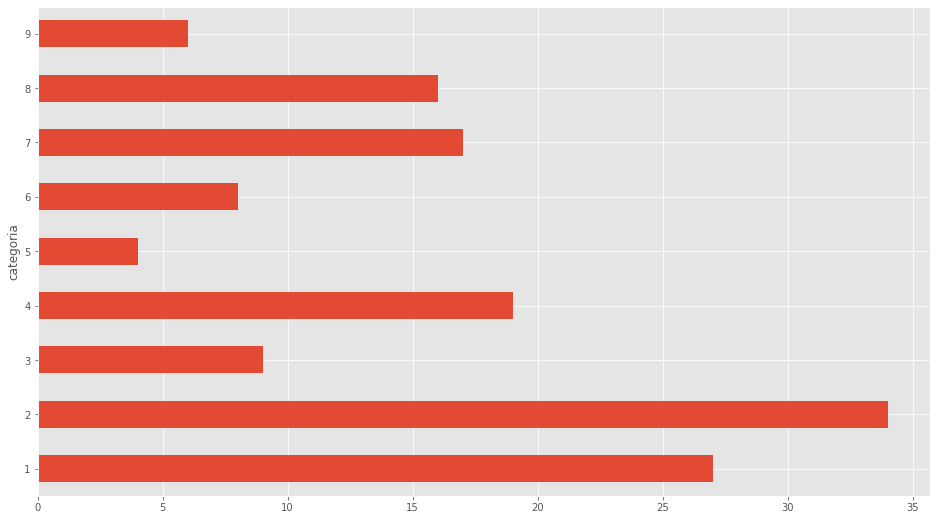

In [23]:
df_psico.groupby('categoria').size().plot.barh()


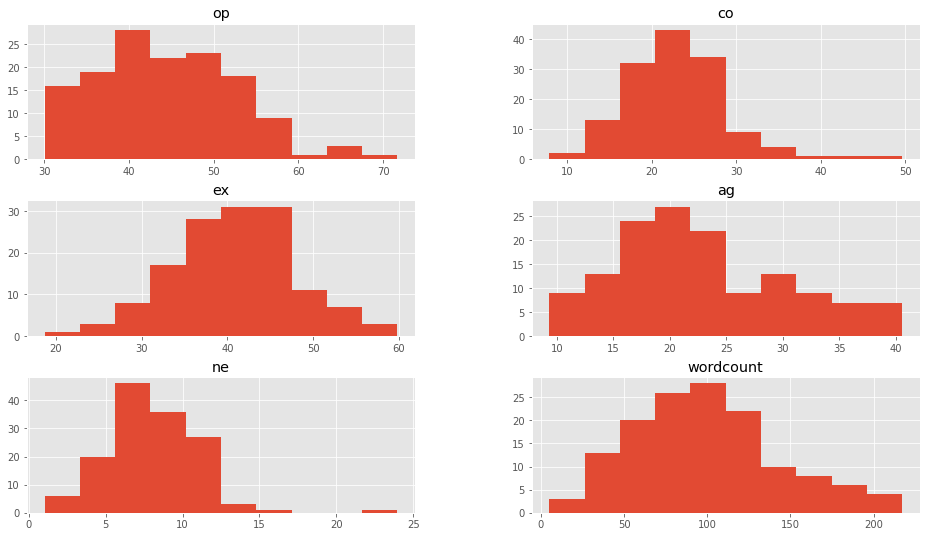

In [24]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

In [25]:
X = np.array(df_psico[["op","ex","ag","co","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

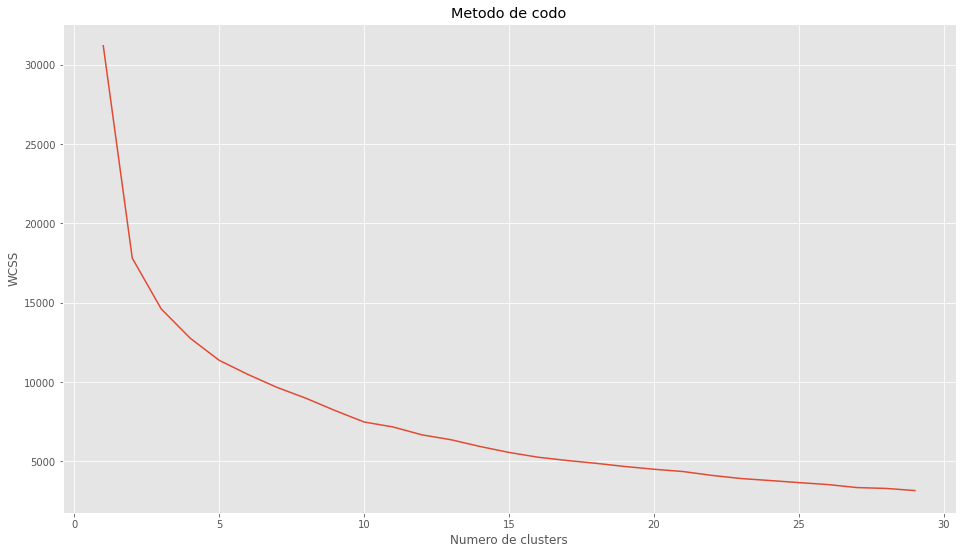

In [27]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.99399066 39.76533903 17.78901229 22.96283582  7.31262629]
 [36.2882059  49.1967934  33.1409964  18.17548937  6.6765052 ]
 [47.47490845 32.44033945 16.58944427 34.77596864  9.05929791]
 [61.93625244 29.62719367 15.08910133 21.92653989  4.93914989]
 [43.03671603 41.47162003 20.90144552 25.35859152  9.77099158]
 [36.85294111 40.43410979 28.70716884 20.95188932  9.31614053]
 [38.81528    21.3382215  13.3573675  17.4348775   8.9133485 ]]


In [77]:
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','yellow','orange',] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])



In [78]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
f3 = df_psico['ag'].values
f4 = df_psico['co'].values
f5 = df_psico['ne'].values

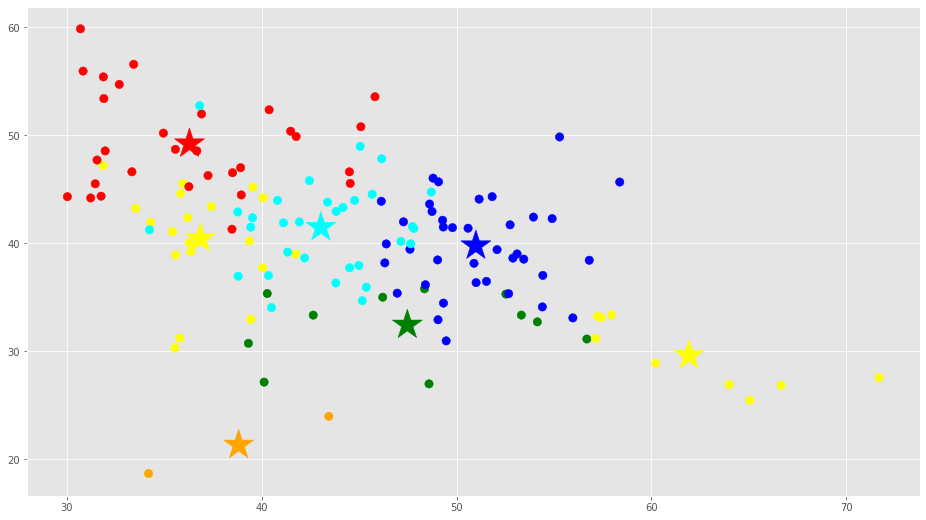

In [79]:
#op -ex
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

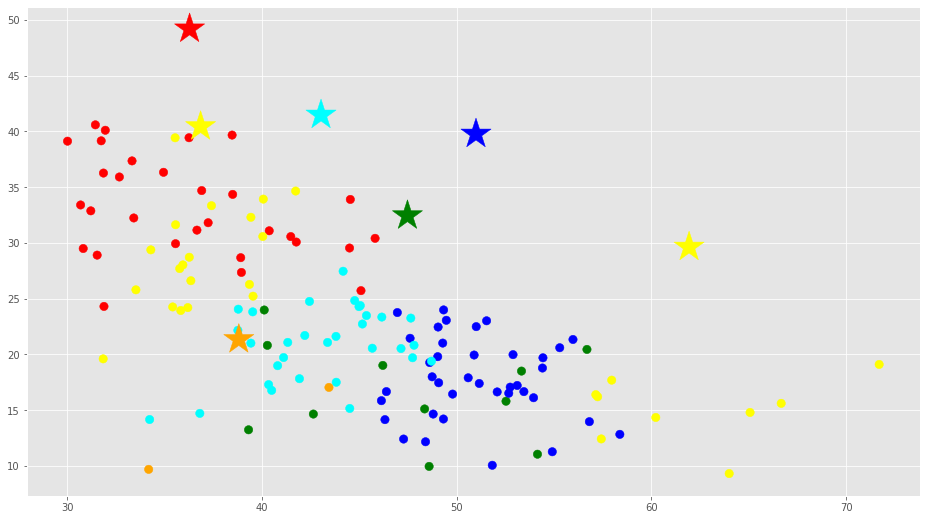

In [80]:
#op -ag
plt.scatter(f1, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

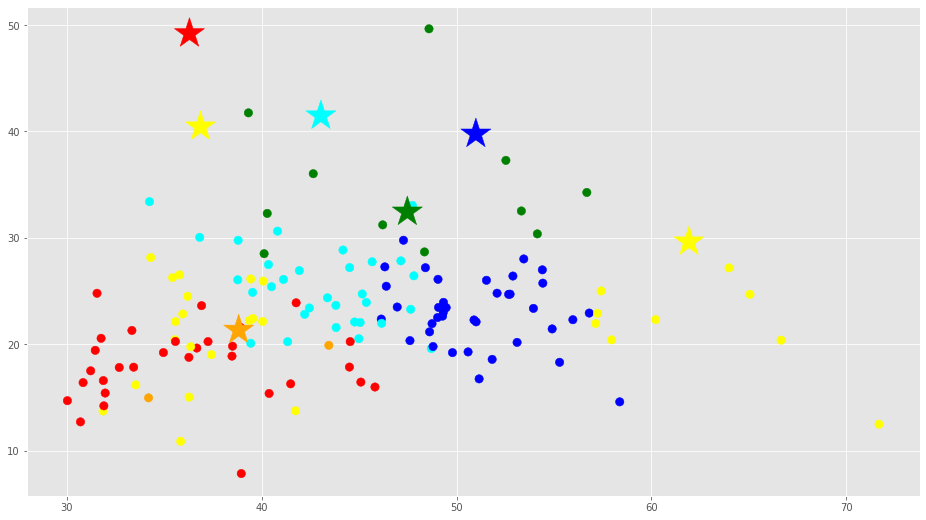

In [81]:
#op -co
plt.scatter(f1, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

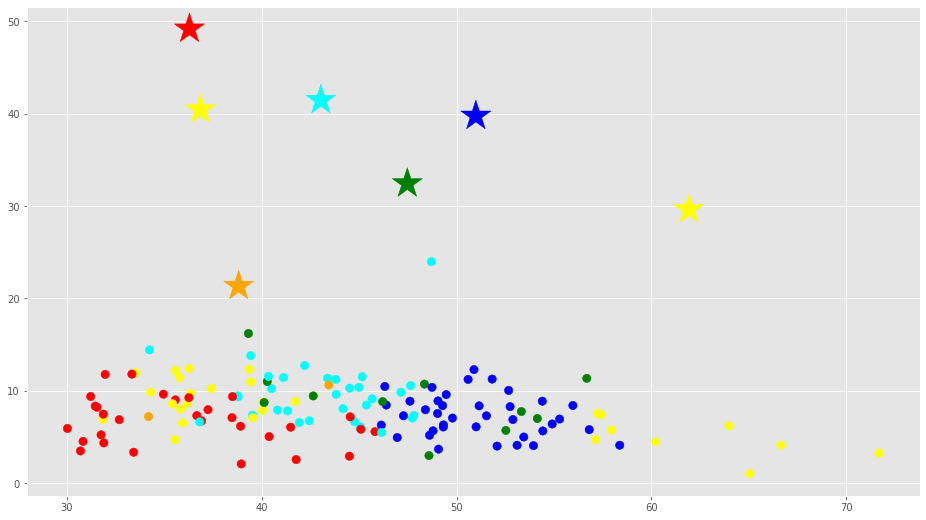

In [82]:
#op -ne
plt.scatter(f1, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

------------------------------------------------------------------------------------------

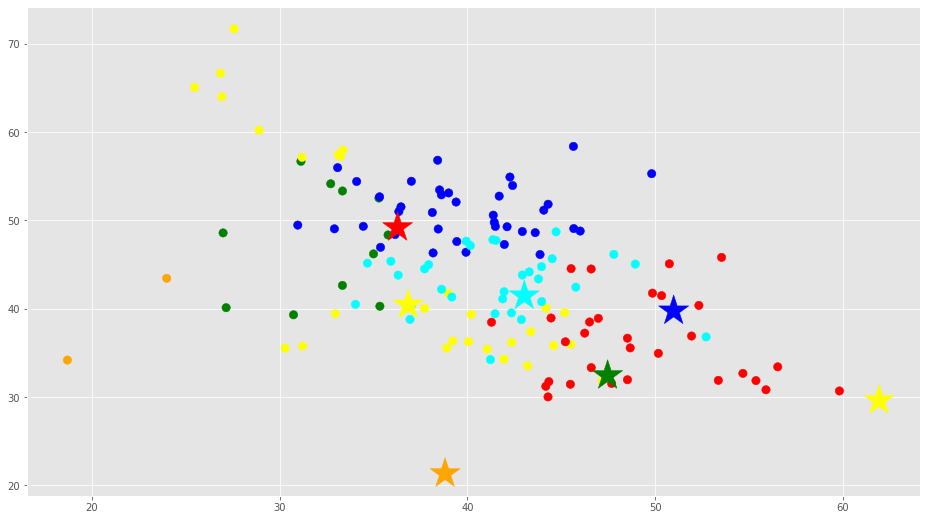

In [83]:
#ex -op
plt.scatter(f2, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

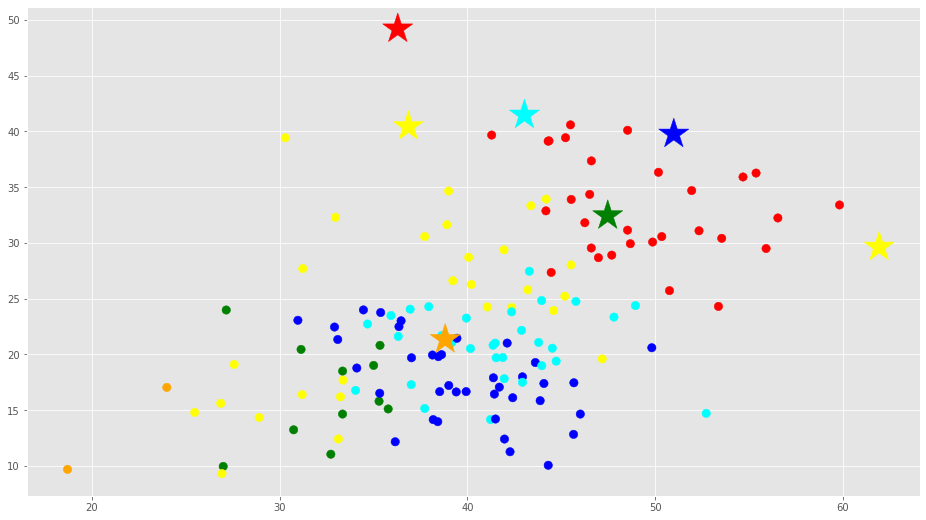

In [84]:
#ex-ag
plt.scatter(f2, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

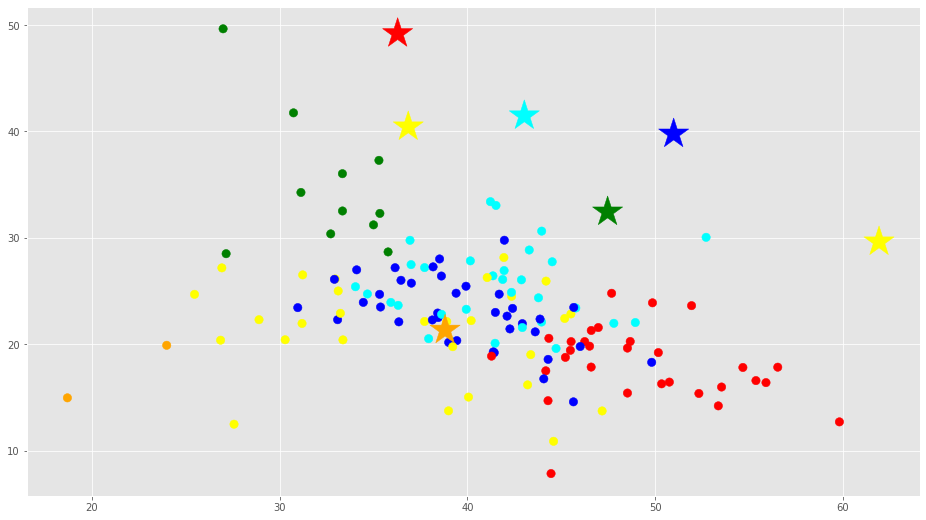

In [85]:
#ex-co
plt.scatter(f2, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

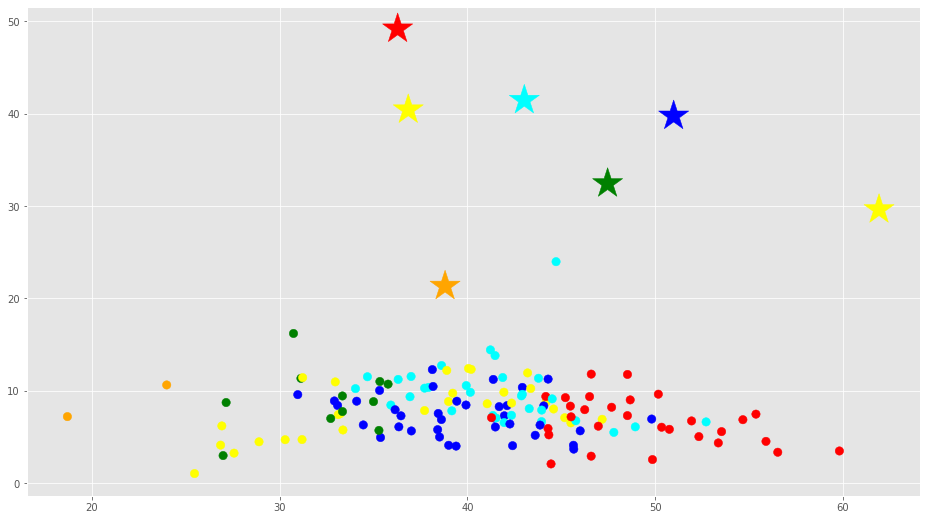

In [86]:
#ex -ne
plt.scatter(f2, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

---------------------------------------------------------------------------------------------

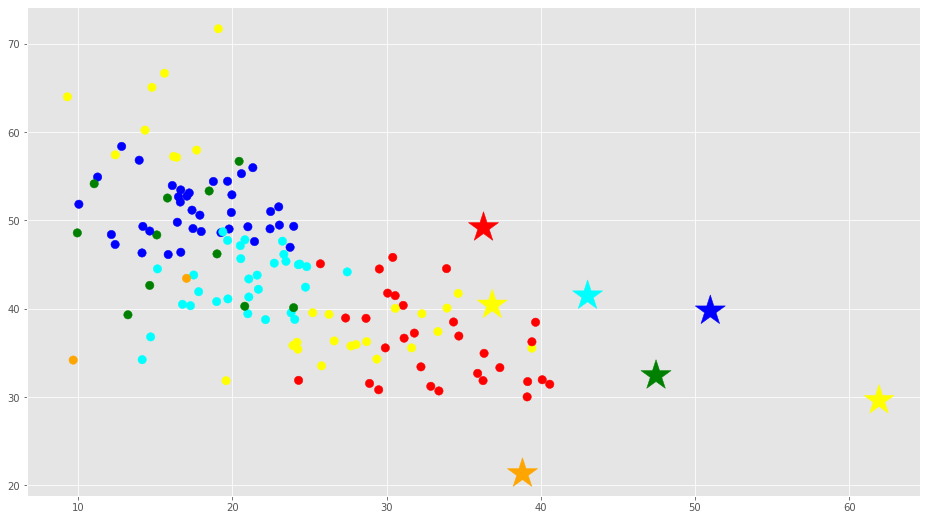

In [87]:
#ag -op
plt.scatter(f3, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

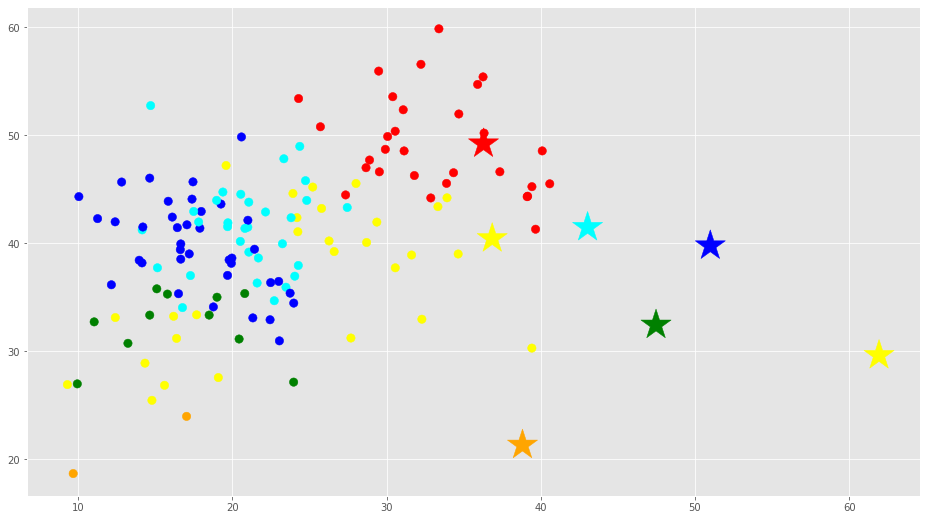

In [88]:
#ag -ex
plt.scatter(f3, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

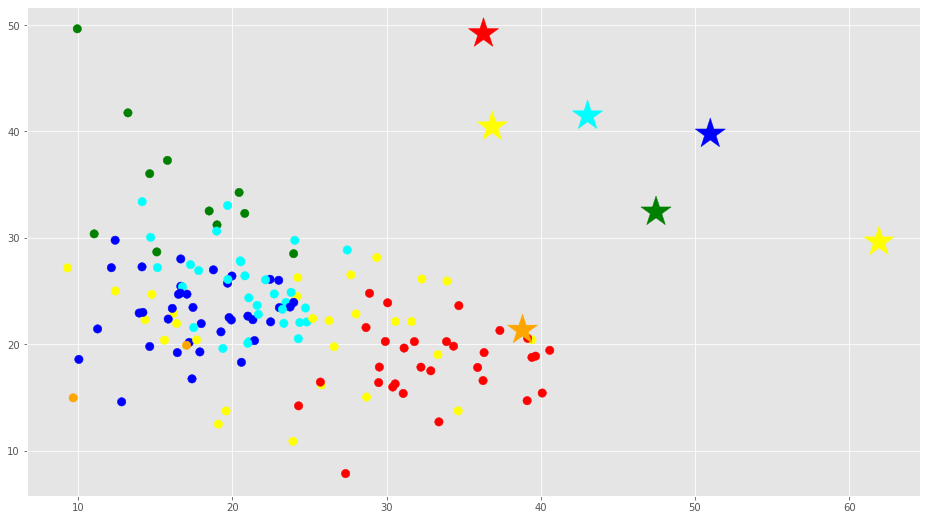

In [89]:
#ag -co
plt.scatter(f3, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

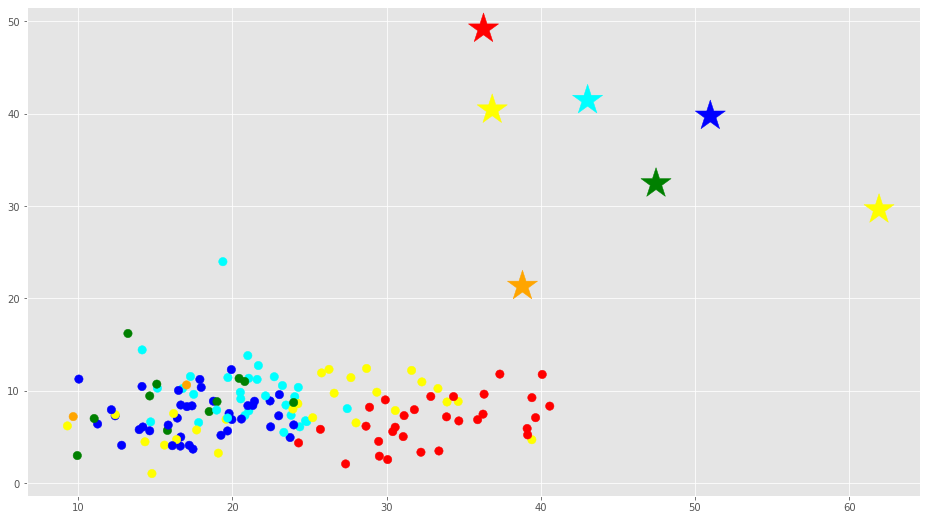

In [90]:
#ag -ne
plt.scatter(f3, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

----------------------------------------------------------------------------------------------------

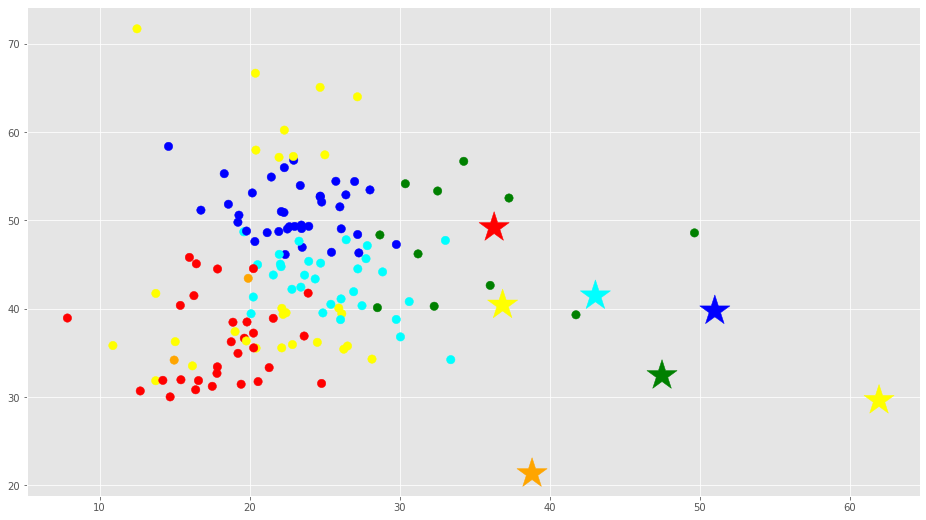

In [91]:
#co -op
plt.scatter(f4, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

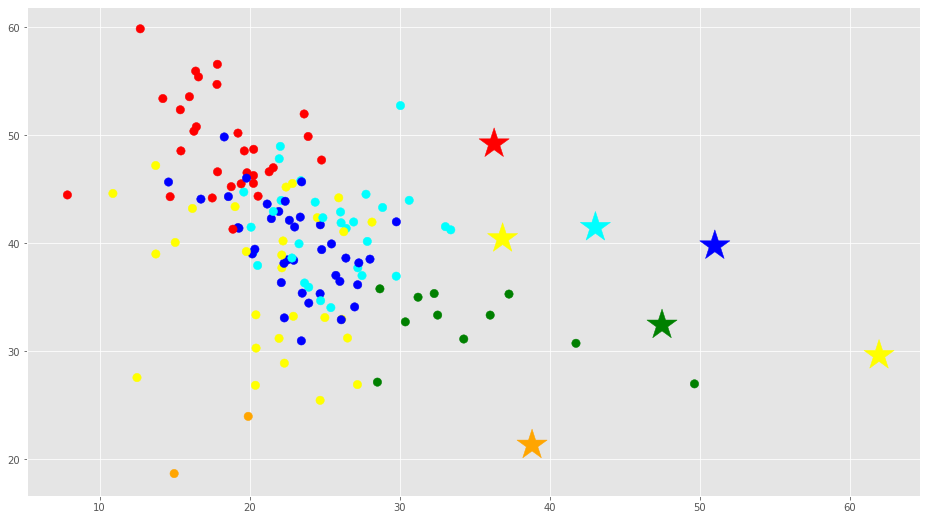

In [92]:
#co -ex
plt.scatter(f4, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

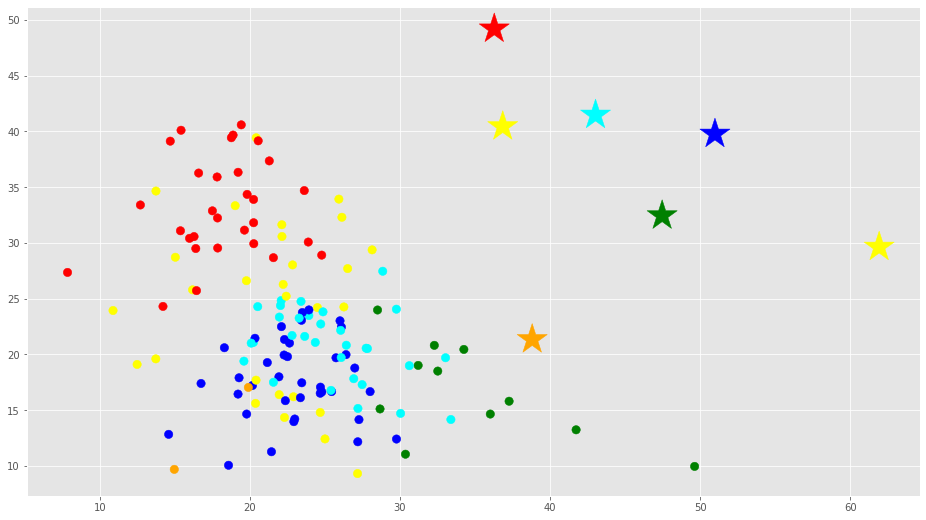

In [93]:
#co -ag
plt.scatter(f4, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

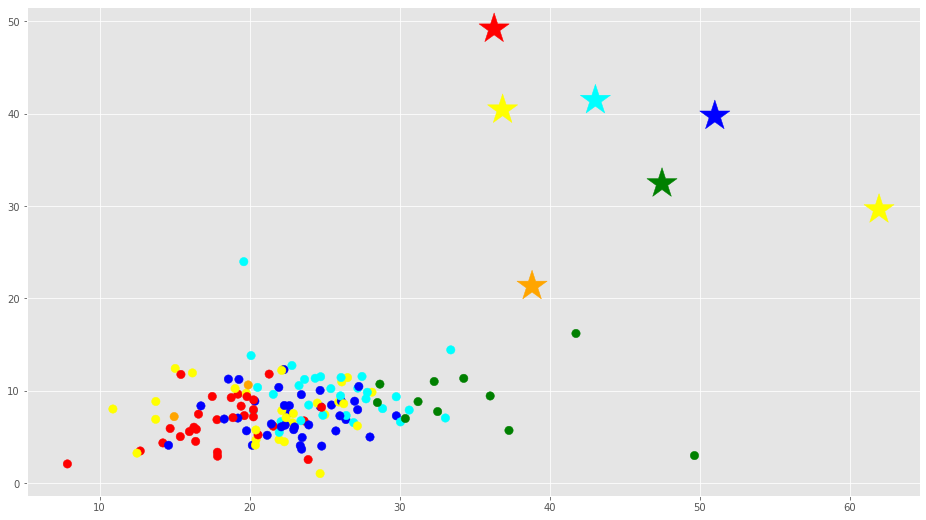

In [94]:
#co -ne
plt.scatter(f4, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

-------------------------------------------------------------------------------------------------------------------

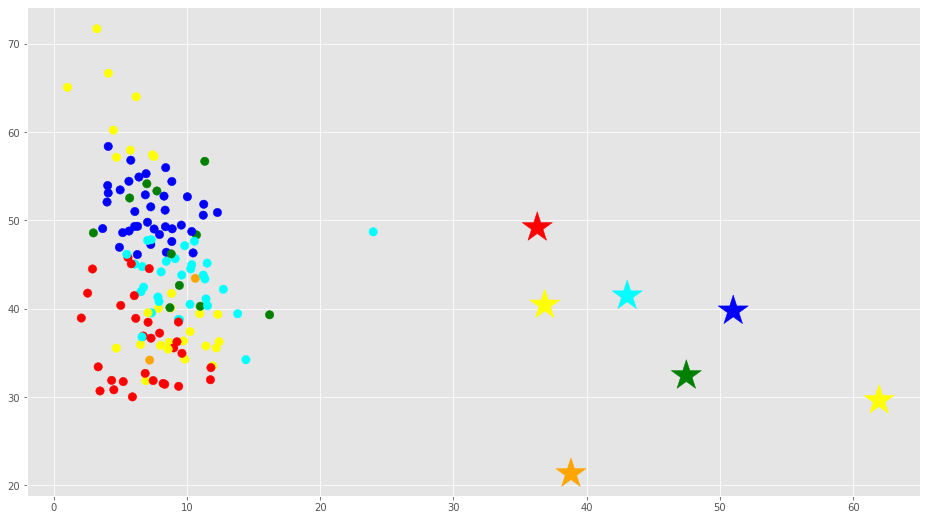

In [95]:
#ne -op
plt.scatter(f5, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

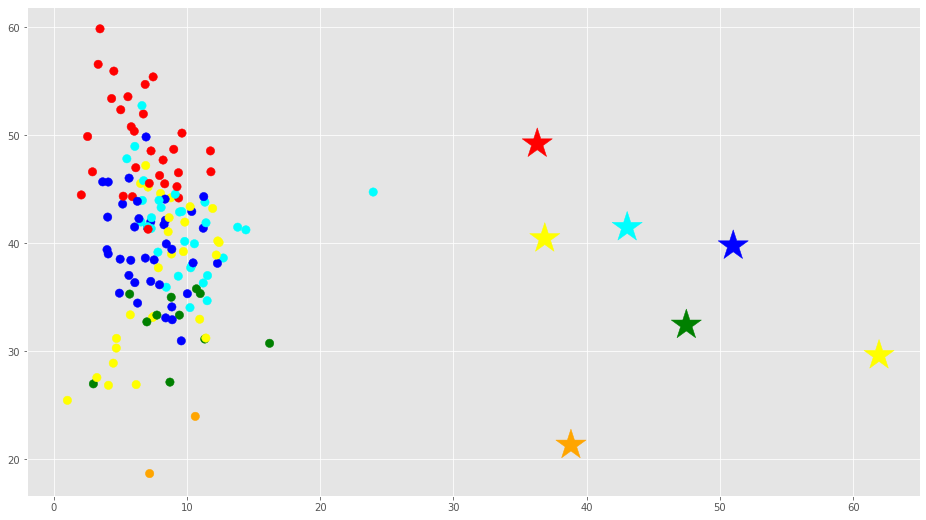

In [96]:
#ne -ex
plt.scatter(f5, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

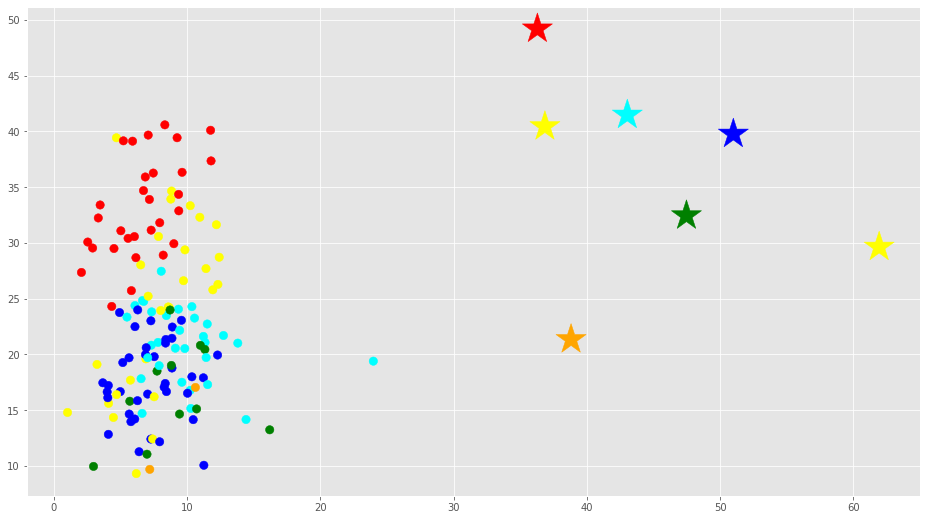

In [97]:
#ne -ag
plt.scatter(f5, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

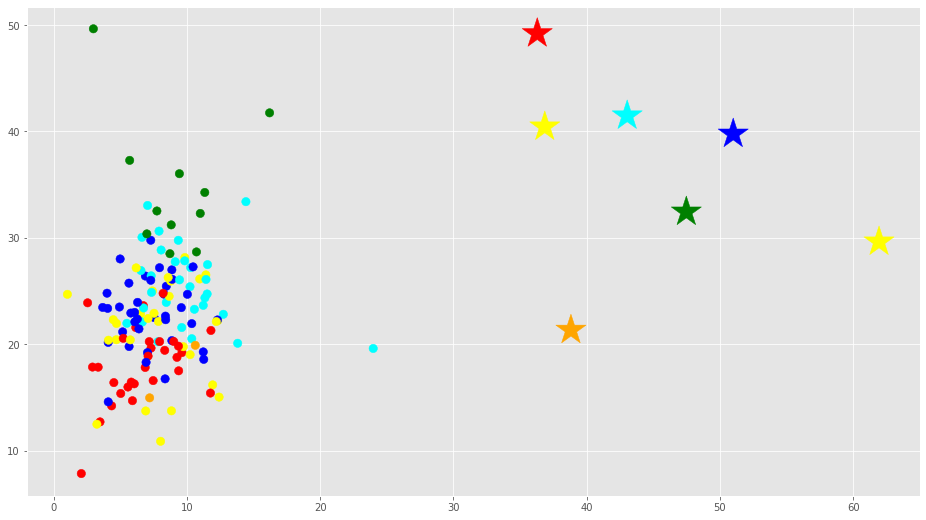

In [98]:
#ne -co
plt.scatter(f5, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [99]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,38
1,red,30
2,green,11
3,yellow,9
4,cyan,31
5,yellow,19
6,orange,2


In [100]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,10.0
2,2,16.0
3,3,5.0
4,4,3.0
5,5,1.0
6,6,1.0
7,7,2.0
8,8,NaN
9,9,NaN


In [101]:

df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,5
1,aguerosergiokun,4
2,albertochicote,5
3,AlejandroSanz,1
4,alfredocasero1,1


In [102]:
df_cluster[df_cluster.cluster == 4]


,data_index,cluster
1,aguerosergiokun,4
11,antoniobanderas,4
14,BarackObama,4
17,BillGates,4
25,cesarmillan,4
30,Clyburn,4
40,DidacLee,4
42,edans,4
46,epunset,4
57,heidiklum,4


In [103]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

CindyCrawford
alfredocasero1
SJP
foofighters
paugasol
JohnKerry
Carrie_Br4dshaw
